PyGSLIB
========

Draw
---------------

The GSLIb equivalent parameter file is

```
                  Parameters for DRAW
                  *******************

START OF PARAMETERS:
data/cluster.dat              \file with data
3                                \   number of variables
1   2   3                        \   columns for variables
0                                \   column for probabilities (0=equal)
-1.0e21   1.0e21                 \   trimming limits
69069    100                     \random number seed, number to draw
draw.out                         \file for realizations
```



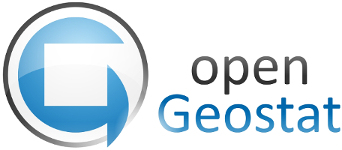

In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib  
import numpy as np
import pandas as pd

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `pygslib.gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
cluster  = pygslib.gslib.read_gslib_file('../datasets/cluster.dat')

print ('\n\t\tCluster Data \n',cluster.tail())





		Cluster Data 
      Xlocation  Ylocation  Primary  Secondary  Declustering Weight
135       31.5       41.5    22.75       8.21                0.427
136       34.5       32.5     9.42       6.76                0.413
137       35.5       31.5     8.48      12.78                0.419
138       35.5       33.5     2.82       9.21                0.271
139       36.5       32.5     5.26      12.40                0.252


## Testing Draw

In [3]:
print (pygslib.gslib.__draw.draw.__doc__)

vo,sumwts,error = draw(vr,wt,rseed,ndraw,[nd,nv])

Wrapper for ``draw``.

Parameters
----------
vr : input rank-2 array('f') with bounds (nd,nv)
wt : input rank-1 array('f') with bounds (nd)
rseed : input int
ndraw : input int

Other Parameters
----------------
nd : input int, optional
    Default: shape(vr,0)
nv : input int, optional
    Default: shape(vr,1)

Returns
-------
vo : rank-2 array('f') with bounds (ndraw,nv)
sumwts : float
error : float



In [4]:
cluster['NO-Weight']=1.
parameters_draw = {
    'vr'    : cluster[['Xlocation','Ylocation','Primary']],  # data
    'wt'    : cluster['NO-Weight'],                          # weight/prob (use wt[:]=1 for equal probability)
    'rseed' : 69069,                                         # random number seed (conditioning cat.)
    'ndraw' : 100}                                           # number to draw

vo,sumwts,error = pygslib.gslib.__draw.draw(**parameters_draw)

print ('error ? ',  error != 0, error)

print ('is 1./sumwts == nd?', 1./sumwts, len(cluster))


error ?  False 0.0
is 1./sumwts == nd? 139.99999921768904 140


In [5]:
#making the output (which is numpy array) a pandas dataframe for nice printing
dfvo=pd.DataFrame(vo,columns= ['Xlocation','Ylocation','Primary'])

## Comparing results with gslib

In [6]:
print (dfvo.head(6))
print ('******')
print (dfvo.tail(6))


   Xlocation  Ylocation  Primary
0       39.5       18.5     0.06
1       39.5       18.5     0.06
2       39.5       18.5     0.06
3       39.5       18.5     0.06
4       39.5       18.5     0.06
5       39.5       18.5     0.06
******
    Xlocation  Ylocation  Primary
94       39.5       18.5     0.06
95       39.5       18.5     0.06
96       39.5       18.5     0.06
97       39.5       18.5     0.06
98       39.5       18.5     0.06
99       39.5       18.5     0.06


**Results in GSLIB ** 
```
   Xlocation    Ylocation      Primary
      31.500       41.500       22.750
       8.500       45.500       0.8100
      39.500       30.500        7.940
       3.500       23.500        1.380
      45.500       22.500        0.930
********
      41.500       45.500        2.750
       2.500        9.500        6.260
      11.500       46.500       0.4000
      21.500       34.500        2.840
       3.500       47.500        1.960
       2.500        8.500        8.900
```